# Deep Neural Network (DNN)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

Import OSNIR Dataset and shuffle data

In [2]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [3]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the Deep Neural Network Model

1 input layer, 2 hidden layers (32 neurons each) and 1 output layer

In [21]:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(6,), activation='relu'),  # first hidden layer
    keras.layers.Dense(32, activation='relu'),  # second hidden layer
    keras.layers.Dense(1) # output layer
])

Early hault of training if loss has not improved in 50 epochs in validation set

In [22]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=50)

Adam Optimizer, Mean Square Error Loss

In [23]:
model.compile(optimizer='adam', loss='mse')

Fit model, run for 500 epochs

In [24]:
model.fit(x_train,y_train,
          validation_data=(x_valid,y_valid),
          epochs=500,
          callbacks=[early_stop],
          batch_size=32,
          verbose=1
          )

Epoch 1/500
57/57 [==============================] - 1s 4ms/step - loss: 248.4097 - val_loss: 86.1414
Epoch 2/500
57/57 [==============================] - 0s 3ms/step - loss: 60.0434 - val_loss: 49.0054
Epoch 3/500
57/57 [==============================] - 0s 2ms/step - loss: 44.4960 - val_loss: 42.7896
Epoch 4/500
57/57 [==============================] - 0s 2ms/step - loss: 39.0590 - val_loss: 37.3546
Epoch 5/500
57/57 [==============================] - 0s 4ms/step - loss: 34.6546 - val_loss: 33.1769
Epoch 6/500
57/57 [==============================] - 0s 4ms/step - loss: 31.0280 - val_loss: 30.9620
Epoch 7/500
57/57 [==============================] - 0s 3ms/step - loss: 28.4518 - val_loss: 28.7117
Epoch 8/500
57/57 [==============================] - 0s 3ms/step - loss: 27.1028 - val_loss: 27.5664
Epoch 9/500
57/57 [==============================] - 0s 3ms/step - loss: 25.5665 - val_loss: 26.4356
Epoch 10/500
57/57 [==============================] - 0s 3ms/step - loss: 24.7738 - val_lo

In [25]:
OSNIR_num = data[:3000-1,0]
Input_num = data[:3000-1,1:7]

In [26]:
OSNIR_est = (model.predict(Input_num))

94/94 [==============================] - 1s 1ms/step


In [27]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[28.0, -1.0, 50.0, 25.0, 0.0, 3.0] => 17.830681 (expected 17.385452)
[44.0, 3.0, 10.0, 25.0, 25.0, 9.0] => 11.582586 (expected 12.215289)
[20.0, 0.0, 10.0, 25.0, 0.0, 15.0] => 19.238708 (expected 19.599546)
[25.0, 3.0, 50.0, 25.0, 12.5, 9.0] => 10.683617 (expected 11.019259)
[9.0, -2.0, 50.0, 25.0, 0.0, 3.0] => 23.105650 (expected 23.664739)
[12.0, -5.0, 5.0, 25.0, 0.0, 9.0] => 29.738222 (expected 29.953129)
[37.0, -5.0, 50.0, 25.0, 0.0, 3.0] => 17.720675 (expected 17.640254)
[8.0, 0.0, 50.0, 12.5, 0.0, 9.0] => 16.842009 (expected 17.130597)
[37.0, 3.0, 10.0, 25.0, 25.0, 9.0] => 12.634636 (expected 13.303436)
[12.0, 3.0, 50.0, 25.0, 12.5, 9.0] => 15.040394 (expected 15.340870)


In [28]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [29]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_DNN.csv",index=False)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00033344, 0.00033344, 0.00133378, 0.00133378,
        0.00433478, 0.01367122, 0.04568189, 0.13804602, 0.22540847,
        0.22507503, 0.19206402, 0.08936312, 0.03267756, 0.01433811,
        0.00966989, 0.00200067, 0.00100033, 0.00033344, 0.00033344,
        0.00033344, 0.00033344, 0.        , 0.00033344, 0.        ,
        0.00033344, 0.00066689, 0.00033344, 0.        , 0.        ,
        0.        , 0.00033344, 0.        , 0.        , 0.        ]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4

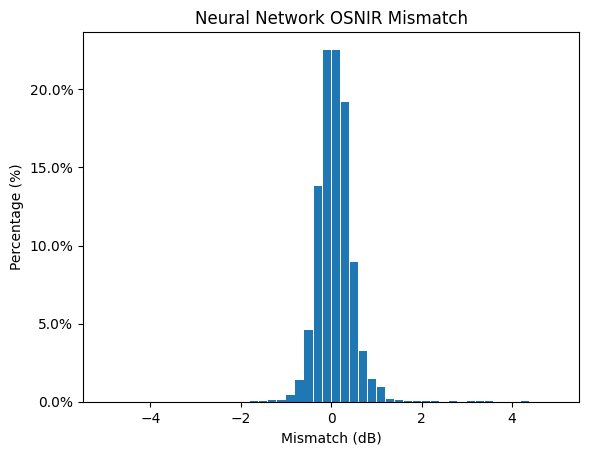

In [47]:
plt.title('Neural Network OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism,
         range=(-5,5),
         rwidth=0.9,
         bins=50,
         weights=np.ones(len(Mism))/len(Mism)
         )